In [1]:
# class imbalance: when one class higher percentage.
# handle: 
# up sampling
# down sampling
# smote

In [2]:
import pandas as pd
import numpy as np

np.random.seed(1)  #for reproducebility

no_samples = 1000
class_0_ratio = 0.9
no_class_0 = int(no_samples*class_0_ratio)
no_class_1 = 100

In [3]:
no_class_0, no_class_1   #imbalanced

(900, 100)

In [4]:
class_0 = {'feature1': np.random.normal(0, 1, no_class_0),
           'feature2': np.random.normal(0, 1, no_class_0),
           'target': [0]*no_class_0
          }
class_0

{'feature1': array([ 1.62434536e+00, -6.11756414e-01, -5.28171752e-01, -1.07296862e+00,
         8.65407629e-01, -2.30153870e+00,  1.74481176e+00, -7.61206901e-01,
         3.19039096e-01, -2.49370375e-01,  1.46210794e+00, -2.06014071e+00,
        -3.22417204e-01, -3.84054355e-01,  1.13376944e+00, -1.09989127e+00,
        -1.72428208e-01, -8.77858418e-01,  4.22137467e-02,  5.82815214e-01,
        -1.10061918e+00,  1.14472371e+00,  9.01590721e-01,  5.02494339e-01,
         9.00855949e-01, -6.83727859e-01, -1.22890226e-01, -9.35769434e-01,
        -2.67888080e-01,  5.30355467e-01, -6.91660752e-01, -3.96753527e-01,
        -6.87172700e-01, -8.45205641e-01, -6.71246131e-01, -1.26645989e-02,
        -1.11731035e+00,  2.34415698e-01,  1.65980218e+00,  7.42044161e-01,
        -1.91835552e-01, -8.87628964e-01, -7.47158294e-01,  1.69245460e+00,
         5.08077548e-02, -6.36995647e-01,  1.90915485e-01,  2.10025514e+00,
         1.20158952e-01,  6.17203110e-01,  3.00170320e-01, -3.52249846e-01,


In [5]:
class_0 = pd.DataFrame(class_0)
class_0

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [6]:
class_0[class_0['target']==0].shape

(900, 3)

# Breakdown of np.random.normal(0, 1, no_class_0):
- Mean (0): The center of the normal distribution.
- Standard deviation (1): Determines the spread of values.
- no_class_0: Number of random values generated.

- Since this follows a normal (Gaussian) distribution, the values can be positive or negative and are not restricted to the range 0 to 1. Instead, they follow a bell curve centered at 0 with most values within the range (-3, 3) (approximately 99.7% of data falls within ±3 standard deviations).

In [7]:
class_1 = pd.DataFrame({'feature1': np.random.normal(3, 1, no_class_1),
           'feature2': np.random.normal(3, 1, no_class_1),
           'target': [1]*no_class_1
          })
class_1

,feature1,feature2,target
0,1.692029,3.933630,1
1,4.472396,1.236225,1
2,3.074876,2.589783,1
3,1.213065,2.546333,1
4,3.165211,2.410570,1
...,...,...,...
95,3.213026,3.188583,1
96,2.195458,3.560918,1
97,2.353418,2.078341,1
98,4.138173,3.647375,1


In [8]:
df = pd.concat([class_0,class_1]).reset_index(drop=True)

In [9]:
df

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
995,3.213026,3.188583,1
996,2.195458,3.560918,1
997,2.353418,2.078341,1
998,4.138173,3.647375,1


In [10]:
df.tail(100)

,feature1,feature2,target
900,1.692029,3.933630,1
901,4.472396,1.236225,1
902,3.074876,2.589783,1
903,1.213065,2.546333,1
904,3.165211,2.410570,1
...,...,...,...
995,3.213026,3.188583,1
996,2.195458,3.560918,1
997,2.353418,2.078341,1
998,4.138173,3.647375,1


In [11]:
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [12]:
# upsampling
df_minority = df[df.target==1]
df_mesority = df[df.target==0]
df_minority

,feature1,feature2,target
900,1.692029,3.933630,1
901,4.472396,1.236225,1
902,3.074876,2.589783,1
903,1.213065,2.546333,1
904,3.165211,2.410570,1
...,...,...,...
995,3.213026,3.188583,1
996,2.195458,3.560918,1
997,2.353418,2.078341,1
998,4.138173,3.647375,1


In [13]:
df_mesority

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [14]:
# replacement>> if replacement is true, it means data points can be repeated.
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, replace = True, n_samples = len(df_mesority), random_state = 1)

In [15]:
df_minority_upsampled

,feature1,feature2,target
937,2.253776,1.681477,1
912,2.448320,2.898619,1
972,2.541698,2.700847,1
909,1.724886,1.748043,1
975,2.427974,4.613562,1
...,...,...,...
936,4.093307,2.373543,1
998,4.138173,3.647375,1
901,4.472396,1.236225,1
932,1.965537,4.084419,1


In [16]:
df_minority_upsampled.target.value_counts()

target
1    900
Name: count, dtype: int64

In [17]:
df_upsampled = pd.concat([df_mesority,df_minority_upsampled])

In [18]:
df_upsampled.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [19]:
# Downsampling
df_mesority

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [20]:
df_mesority_down_sampled = resample(df_mesority, replace = True, n_samples = len(df_minority), random_state = 1)

In [21]:
df_mesority_down_sampled

,feature1,feature2,target
37,0.234416,0.949809,0
235,-1.233121,-0.438055,0
72,0.160037,-0.839989,0
767,0.237333,1.630906,0
715,1.498108,-1.899463,0
...,...,...,...
87,0.377564,0.932721,0
793,0.049080,-0.825654,0
243,-1.396620,-0.267004,0
348,0.461164,-0.227253,0


In [22]:
df_down_sampled = pd.concat([df_minority,df_mesority_down_sampled])

In [23]:
df_down_sampled.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

In [24]:
# Smote: Synthetic minority oversampling technique

In [25]:
from sklearn.datasets import make_classification
x, y = make_classification(n_samples = 1000, n_redundant = 0, n_features = 2, n_clusters_per_class = 1, weights = [0.90])

# weight(0.9) means mesority class will be 90%

In [26]:
x

array([[-1.07876139,  0.6322917 ],
       [-1.62310799, -0.05386502],
       [-0.92187944,  1.34630462],
       ...,
       [-2.22214902, -1.74577853],
       [-0.9482506 ,  1.25173138],
       [-1.19836117,  1.37319785]])

In [27]:
y

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
df1 = pd.DataFrame(x, columns = ['f1','f2'])
df2 = pd.DataFrame(y, columns = ['target'])
# df1.target = y
final_df = pd.concat([df1,df2], axis = 1)

In [29]:
final_df

,f1,f2,target
0,-1.078761,0.632292,0
1,-1.623108,-0.053865,0
2,-0.921879,1.346305,0
3,-2.014224,0.242973,0
4,0.707407,0.382432,1
...,...,...,...
995,-1.617138,0.720443,0
996,-0.674183,1.593318,0
997,-2.222149,-1.745779,1
998,-0.948251,1.251731,0


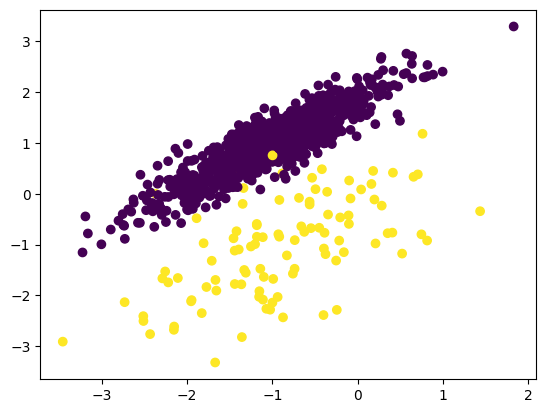

In [30]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'], final_df['f2'], c = final_df['target'])

In [31]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
oversample = SMOTE()   #oversample object

In [34]:
x, y = oversample.fit_resample(final_df[['f1','f2']], final_df['target'])

In [35]:
x

,f1,f2
0,-1.078761,0.632292
1,-1.623108,-0.053865
2,-0.921879,1.346305
3,-2.014224,0.242973
4,0.707407,0.382432
...,...,...
1789,0.215346,-0.096199
1790,-0.999079,-0.136366
1791,-1.000188,0.752173
1792,-1.108114,-2.160650


In [36]:
df1 = pd.DataFrame(x, columns = ['f1','f2'])
df2 = pd.DataFrame(y, columns = ['target'])
smote_df = pd.concat([df1,df2], axis = 1)

In [37]:
smote_df

,f1,f2,target
0,-1.078761,0.632292,0
1,-1.623108,-0.053865,0
2,-0.921879,1.346305,0
3,-2.014224,0.242973,0
4,0.707407,0.382432,1
...,...,...,...
1789,0.215346,-0.096199,1
1790,-0.999079,-0.136366,1
1791,-1.000188,0.752173,1
1792,-1.108114,-2.160650,1


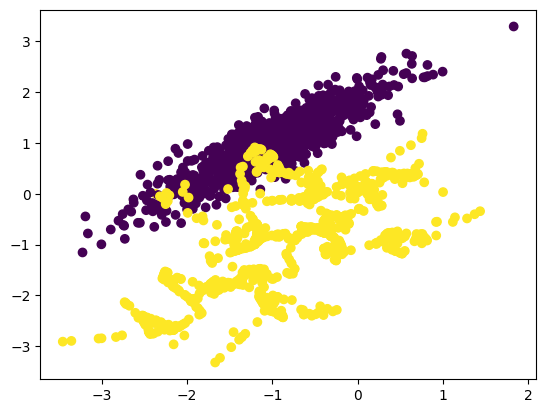

In [38]:
plt.scatter(smote_df['f1'], smote_df['f2'], c = smote_df['target'])